In [1]:
from imutils.video import VideoStream
from imutils.video import FPS
import numpy as np
import imutils
import time
import cv2
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import easyocr
from torchvision import models
from torchvision import transforms
import pickle
from PIL import Image
import math

In [4]:
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory

In [5]:
train = pd.read_csv('train/train.csv')

In [6]:
train

id                 date  employee  action
0     1256  2022-05-24 08:08:36         2    15.0
1     1257  2022-05-24 08:08:37         2     4.0
2     1258  2022-05-24 08:12:13         3    15.0
3     1259  2022-05-24 08:12:25         3     2.0
4     1260  2022-05-24 08:12:42         3    12.0
...    ...                  ...       ...     ...
3514  4770  2022-05-28 07:42:51         0     4.0
3515  4771  2022-05-28 07:44:27         0    14.0
3516  4772  2022-05-28 07:44:36         0     3.0
3517  4773  2022-05-28 07:46:21         0    13.0
3518  4774  2022-05-28 07:46:31         0     4.0

[3519 rows x 4 columns]

In [7]:
test = pd.read_csv('test/test.csv')
test

id                 date
0      135  2022-05-22 11:51:06
1      136  2022-05-22 11:51:25
2      137  2022-05-22 12:04:27
3      138  2022-05-22 12:07:56
4      139  2022-05-22 12:08:10
...    ...                  ...
1116  1251  2022-05-24 07:57:00
1117  1252  2022-05-24 07:57:32
1118  1253  2022-05-24 07:57:34
1119  1254  2022-05-24 07:57:39
1120  1255  2022-05-24 07:57:41

[1121 rows x 2 columns]

In [8]:
test[test.date.duplicated() == True]

id                 date
35    170  2022-05-22 13:00:32
48    183  2022-05-22 13:04:29
88    223  2022-05-22 14:05:39
124   259  2022-05-22 15:36:38
259   394  2022-05-23 07:12:03
328   463  2022-05-23 08:07:21
472   607  2022-05-23 11:17:44
485   620  2022-05-23 11:22:40
555   690  2022-05-23 12:00:06
569   704  2022-05-23 12:02:27
640   775  2022-05-23 13:00:16
643   778  2022-05-23 13:02:38
685   820  2022-05-23 14:02:01
689   824  2022-05-23 14:02:16
759   894  2022-05-23 14:44:26
821   956  2022-05-23 16:43:00
831   966  2022-05-23 16:44:51
916  1051  2022-05-23 17:44:06

In [9]:
test[test.date == '2022-05-22 13:00:32']

id                 date
34  169  2022-05-22 13:00:32
35  170  2022-05-22 13:00:32

In [10]:
sorted(train.employee.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11]

In [11]:
sorted(train.action.unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 18.0,
 19.0]

In [12]:
train[train.action == 0.0]

id                 date  employee  action
1216  2472  2022-05-26 06:53:12         2     0.0
1217  2473  2022-05-26 06:53:29         2     0.0
1233  2489  2022-05-26 07:06:47        10     0.0
1234  2490  2022-05-26 07:06:53        10     0.0
1374  2630  2022-05-26 10:07:56         0     0.0
1411  2667  2022-05-26 10:40:57         0     0.0
1412  2668  2022-05-26 10:41:12         0     0.0
1419  2675  2022-05-26 10:42:13         0     0.0
1435  2691  2022-05-26 11:05:26         0     0.0
2118  3374  2027-05-27 00:18:52         0     0.0
2126  3382  2027-05-27 01:58:29         0     0.0

In [13]:
vs = cv2.VideoCapture("train/train1.avi")

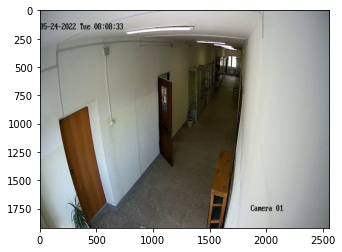

In [14]:
ret, frame = vs.read()

plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [15]:
# video1
h, w, c = frame.shape
h, w, c

(1920, 2560, 3)

In [16]:
# video2
h, w, c = frame.shape
h, w, c

(1920, 2560, 3)

In [17]:
frame = cv2.resize(frame, (1920,1080))

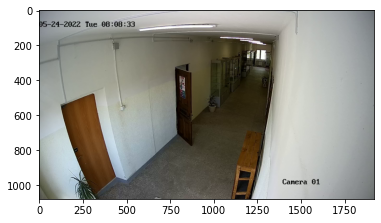

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
# –°–ª–æ–≤–∞—Ä—å —Å –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏ –Ω–∏–∂–Ω–∏—Ö —Ç–æ—á–µ–∫ –¥–≤–µ—Ä–µ–π
door_dict = {'1': np.array((1000, 350)),
            '2': np.array((660, 840)),
            '3': np.array((380, 1140)),
            '4': np.array((320, 1228)),
            '5': np.array((310, 1310)),
            '6': np.array((350, 1310)),
            '7': np.array((390, 1300)),
            '8': np.array((460, 1300)),
            '9': np.array((680, 1290))}

In [24]:
img = frame[:h//9,:w//3,:]

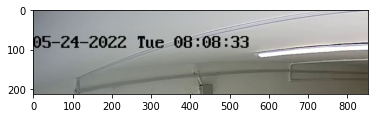

In [25]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [26]:
# Model
seek_model = torch.hub.load('ultralytics/yolov5', 'yolov5l6')  # or yolov5n - yolov5x6, custom

Using cache found in /home/andrey/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 üöÄ 2022-8-31 Python-3.9.2 torch-1.11.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4040MiB)

Fusing layers... 
YOLOv5l6 summary: 476 layers, 76726332 parameters, 0 gradients
Adding AutoShape... 


In [27]:
cls_model = models.resnet18()
cls_model = torch.load('cls_model.pt')
DEVICE = torch.device("cuda")
cls_model.to(DEVICE)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [28]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [44]:
def clean_date(d):
    dig = '0123456789-:'; nd = '';
    date = ' '.join(d).replace('Z', '2').replace('z', '2').replace('O', '0')
    # print(date)
    if date.find('-202 ') >= 0: date=date.replace('202','2022');
    # print(date.find('-202 '))
    # print(nd)
    for it in date:
        if it in dig: nd += it;
    # print(nd)
    nd = '2022 '.join(nd.split('2022'))
    if len(nd) < 18: return '0';
    # print(nd)
    ddd = nd.split(' ')[0].split('-')
    if len(ddd) != 3: return '0';
    res = ddd[2]+'-'+ddd[0][-2:]+'-'+ddd[1]+' '+nd.split(' ')[1]
    return res

In [30]:
def get_class(im):
    im = Image.fromarray(im)
    normalize = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ])
    im = np.array(im.resize((224, 224)))
    im = np.array(im / 255, dtype='float32')
    im = normalize(im)
    cls_model.eval()
    pred = cls_model(im.unsqueeze(0).to(DEVICE)).cpu()
    probs = torch.nn.functional.softmax(pred.detach(), dim=-1).numpy()
    y_pred = label_encoder.classes_[np.argmax(probs,-1)][0]
    return y_pred

In [31]:
def get_person(image):
    df = seek_model(image).pandas().xyxy[0]
    if len(df[df['name'] == 'person']) > 0:
        for item in df[df['name'] == 'person'].values:
            xmin = int(item[0])
            xmax = int(item[2])
            ymin = int(item[1])
            ymax = int(item[3])
            x=(xmin+xmax)//2
            coords = (ymax, x)
            cls = get_class(image[ymin:ymax,xmin:xmax,:])
            return coords, cls
    return (0,0), -1

In [32]:
def get_action(crd):
    crd = np.array(crd)
    res = 100000000; act = 0;
    for k in door_dict:
        r = math.dist(door_dict[k], crd)
        if r < res:
            res = r; act = k;
    return act

In [46]:
video = cv2.VideoCapture("test/test.avi")
fps = video.get(cv2.CAP_PROP_FPS)
fr = 0
old_date = ''; imcount = 0;
idx_list = []
action_stack = []
g = open('result.csv', 'a'); g.write('id,employee,action\n'); g.close();
while True:
    idx = []
    ret, frame = video.read()
    if not ret:
        print("end of file")
        break
    fr += 1
    if fr % 15 != 0: continue;
        
    h, w, c = frame.shape
    if h != 1080 and w != 1920:
        frame = cv2.resize(frame, (1920,1080))
    date_img = frame[:h//9,:w//3,:]
    date = reader.readtext(date_img, detail=0)
    # print(date)
    date = clean_date(date)
    if date == '0': continue;
    if old_date != date:
        old_date = date
        # print('new',date)
    
    df = test[test.date == date]
    if len(df) > 0:
        for it in df.values:
            # print('many')
            idx.append(it[0])
            # print(df.id.item())

    image = frame.copy()
    coords, cls = get_person(image)
    # print(coords, cls)
    
    if coords == (0,0):
        act_cls = 0
    else:
        act_cls = get_action(coords)

    # print(cls, act_cls)
    action_stack.append((cls, act_cls))

    if len(idx) > 0:
        print('–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏', idx)
        print('–∫–ª–∞—Å—Å—ã', cls, act_cls)
        if len(action_stack) > 4:
            cl_old = 0; cla_old = 0; cla_cnt = 0;
            for cll in range(len(action_stack)-1, -1, -1):
                cl, cla = action_stack[cll]
                if cl == -1:
                    cla_cnt += 1
                    continue
                else:
                    if cla_cnt > 2:
                        cl_old = cl; cla_old = '1'+cla;
                    else:
                        cl_old = cl; cla_old = cla;
                    break;
            
            for ind in idx:
                if ind not in idx_list:
                    g = open('result.csv', 'a'); g.write(f'{ind},{cl_old},{cla_old}\n'); g.close();
                    idx_list.append(ind)

    if len(action_stack) > 30:
        action_stack.pop(0)
        
# g.close()

–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [135]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [135]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [136]
–∫–ª–∞—Å—Å—ã 0 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [136]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [137]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [138]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [138]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [139]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [140]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [141]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [141]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [142]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [143]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [144]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [144]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [145]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [146]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏

–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [292]
–∫–ª–∞—Å—Å—ã 3 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [293]
–∫–ª–∞—Å—Å—ã 3 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [294]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [295]
–∫–ª–∞—Å—Å—ã 3 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [295]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [296]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [296]
–∫–ª–∞—Å—Å—ã 3 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [297]
–∫–ª–∞—Å—Å—ã 0 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [297]
–∫–ª–∞—Å—Å—ã 0 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [298]
–∫–ª–∞—Å—Å—ã 10 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [299]
–∫–ª–∞—Å—Å—ã 5 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [299]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [300]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [300]
–∫–ª–∞—Å—Å—ã 2 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [301]
–∫–ª–∞—Å—Å—ã 0 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [301]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [302]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [303]
–

–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [438]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [438]
–∫–ª–∞—Å—Å—ã 0 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [439]
–∫–ª–∞—Å—Å—ã 10 3
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [440]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [440]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [441]
–∫–ª–∞—Å—Å—ã 5 7
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [441]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [442]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [443]
–∫–ª–∞—Å—Å—ã 10 9
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [443]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [444]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [445]
–∫–ª–∞—Å—Å—ã 0 7
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [446]
–∫–ª–∞—Å—Å—ã 0 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [447]
–∫–ª–∞—Å—Å—ã 0 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [447]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [448]
–∫–ª–∞—Å—Å—ã 5 7
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [449]
–∫–ª–∞—Å—Å—ã 3 3
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [449]

–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [581]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [581]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [583]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [583]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [584]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [584]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [585]
–∫–ª–∞—Å—Å—ã 10 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [585]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [586]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [587]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [587]
–∫–ª–∞—Å—Å—ã 0 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [588]
–∫–ª–∞—Å—Å—ã 0 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [589]
–∫–ª–∞—Å—Å—ã 0 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [589]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [590]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [590]
–∫–ª–∞—Å—Å—ã 3 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [591]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [5

–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [725]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [725]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [726]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [726]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [727]
–∫–ª–∞—Å—Å—ã 10 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [727]
–∫–ª–∞—Å—Å—ã 0 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [728]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [729]
–∫–ª–∞—Å—Å—ã 3 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [730]
–∫–ª–∞—Å—Å—ã 0 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [730]
–∫–ª–∞—Å—Å—ã 4 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [731]
–∫–ª–∞—Å—Å—ã 0 3
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [732]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [732]
–∫–ª–∞—Å—Å—ã 3 7
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [733]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [733]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [734]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [734]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [735

–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [872]
–∫–ª–∞—Å—Å—ã 0 5
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [872]
–∫–ª–∞—Å—Å—ã 0 5
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [873]
–∫–ª–∞—Å—Å—ã 10 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [874]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [874]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [875]
–∫–ª–∞—Å—Å—ã 0 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [875]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [876]
–∫–ª–∞—Å—Å—ã 0 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [877]
–∫–ª–∞—Å—Å—ã 0 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [877]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [878]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [878]
–∫–ª–∞—Å—Å—ã 0 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [879]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [880]
–∫–ª–∞—Å—Å—ã 0 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [881]
–∫–ª–∞—Å—Å—ã 0 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [881]
–∫–ª–∞—Å—Å—ã 0 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [882]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [882]
–

–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1022]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1022]
–∫–ª–∞—Å—Å—ã 5 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1023]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1024]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1024]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1025]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1025]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1026]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1026]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1027]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1028]
–∫–ª–∞—Å—Å—ã 3 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1028]
–∫–ª–∞—Å—Å—ã 3 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1029]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1030]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1030]
–∫–ª–∞—Å—Å—ã 3 6
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1031]
–∫–ª–∞—Å—Å—ã 10 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1031]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—

–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1163]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1163]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1164]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1164]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1165]
–∫–ª–∞—Å—Å—ã 0 4
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1165]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1166]
–∫–ª–∞—Å—Å—ã 10 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1167]
–∫–ª–∞—Å—Å—ã 10 2
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1167]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1168]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1169]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1169]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1170]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1170]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1171]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1171]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥–ª—è –∑–∞–ø–∏—Å–∏ [1172]
–∫–ª–∞—Å—Å—ã -1 0
–∏–Ω–¥–µ–∫—Å –¥

In [47]:
test

id                 date
0      135  2022-05-22 11:51:06
1      136  2022-05-22 11:51:25
2      137  2022-05-22 12:04:27
3      138  2022-05-22 12:07:56
4      139  2022-05-22 12:08:10
...    ...                  ...
1116  1251  2022-05-24 07:57:00
1117  1252  2022-05-24 07:57:32
1118  1253  2022-05-24 07:57:34
1119  1254  2022-05-24 07:57:39
1120  1255  2022-05-24 07:57:41

[1121 rows x 2 columns]

In [48]:
myres_d = pd.read_csv('result.csv')
myres_d

id  employee  action
0      135         0       0
1      136         0       4
2      137         3      13
3      138         3      13
4      139         5      14
...    ...       ...     ...
1085  1251         0       6
1086  1252         0      16
1087  1253         0      16
1088  1254         0      16
1089  1255         0       6

[1090 rows x 3 columns]

In [49]:
myres = pd.read_csv('result.csv', index_col='id')
myres

employee  action
id                    
135          0       0
136          0       4
137          3      13
138          3      13
139          5      14
...        ...     ...
1251         0       6
1252         0      16
1253         0      16
1254         0      16
1255         0       6

[1090 rows x 2 columns]

In [50]:
for idx in list(set(test.id) - set(myres_d.id)):
    myres.loc[idx] = {'employee':0,'action':0}

In [54]:
mrs = myres.copy()

In [58]:
mrs.sort_index().to_csv('result2.csv')

In [248]:
myres.index = myres.id
myres

id  employee  action
id                        
135  135         0       0
136  136         2      14
137  137         0      13
138  138         0       0
139  139         2       4
..   ...       ...     ...
243  243         0       0
244  244         0       0
886  886         0       0
887  887         0       0
888  888         0       0

[1121 rows x 3 columns]

In [249]:
myres.drop(['id'], axis=1, inplace=True)
myres

employee  action
id                   
135         0       0
136         2      14
137         0      13
138         0       0
139         2       4
..        ...     ...
243         0       0
244         0       0
886         0       0
887         0       0
888         0       0

[1121 rows x 2 columns]

In [262]:
myres.action.unique()

array([ 0,  4, 13, 14,  9, 19,  5,  3,  8,  2, 12,  6, 16,  7, 17,  1, 11, 18, 15])

In [263]:
myres.employee.unique()

array([ 0,  5, 10,  2,  8,  3,  6, 11])

In [264]:
myres.to_csv('result2.csv')